In [249]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('hw1_input.csv')

In [250]:
# data conversion for label encoding and intermediate usage for one-hot-encoding
import numpy as np
data = np.array(df)
data[data=='Female'] = 0
data[data=='Male'] = 1
data[data=='Abnormal'] = 0
data[data=='Angina'] = 1
data[data=='Asymptomatic'] = 2
data[data=='None'] = 3
data[data=='No'] = 0
data[data=='Yes'] = 1
data[data==' hyper'] = 0
data[data=='abnorm'] = 1
data[data=='norm'] = 2
data[data=='Down'] = 0
data[data=='Flat'] = 1
data[data=='Up'] = 2
data[data=='Fixed Defect'] = 0
data[data=='Normal'] = 1
data[data=='reversible Defect'] = 2
data[data=='Abnormal'] = 0

In [243]:
# for one-hot-encoding (did not perform for this task)
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(categorical_features=[1,2,5,6,8,10,12])
#OneHotEncData=data#OneHotEncData = df.iloc[:,0:13].values
#print OneHotEncData.shape
#OneHotEncData = enc.fit_transform(OneHotEncData).toarray()
#print OneHotEncData.shape

In [251]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data[:,0:13], data[:,13], test_size=0.20)
#train_data, test_data, train_labels, test_labels = train_test_split(OneHotEncData, data[:,13], test_size=0.20)
print train_data.shape
print test_data.shape
tr_data = train_data
te_data = test_data

(216, 13)
(54, 13)


In [252]:
train_data = tr_data
test_data = te_data

[u'major vessels', u'angina', u'Chest Pain', u'max hr', u'oldpeak', u'fasting blood sugar > 120', u'Cholestoral', u'defect', u'slope', u'BP', u'Sex', u'resting ECG', u'Age']


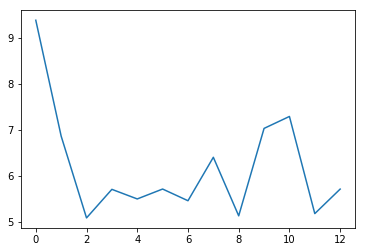

[u'max hr', u'Chest Pain', u'Cholestoral', u'BP', u'resting ECG', u'fasting blood sugar > 120', u'Sex', u'Age', u'oldpeak', u'defect', u'angina', u'slope']


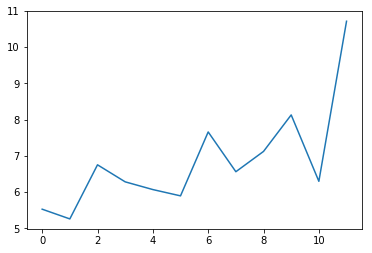

In [220]:
# RSS forward selection and backward elimination algorithms for categorical data handled through label encoding 
# (has not been used in the report as selection of features was better from the F-statistic)
from sklearn import linear_model

def compute_rss(pred, truth):
    return sum((pred-truth)**2)

indDict = {'Age':0,'Sex':1,'Chest Pain':2,'BP':3,'Cholestoral':4,'fasting blood sugar > 120':5,'resting ECG':6,'max hr':7,'angina':8,'oldpeak':9,'slope':10,'major vessels':11,'defect':12}
# feature selection (forward selection)
def rss_feat_fwd(indDict):
    rss = []
    selected_feat = []
    remaining_feat = [u'Age', u'Sex', u'Chest Pain', u'BP', u'Cholestoral',u'fasting blood sugar > 120', u'resting ECG', u'max hr', u'angina',u'oldpeak', u'slope', u'major vessels', u'defect']
    for i in range(13):
        max_val = float('inf')
        for j in remaining_feat:
            lin_reg = linear_model.LinearRegression()
            ind = [indDict[i] for i in selected_feat]
            ind.append(indDict[j])
            train_data, test_data, train_labels, test_labels = train_test_split(data[:,ind], data[:,13], test_size=0.20)
            lin_reg.fit(train_data, train_labels)
            pred = lin_reg.predict(test_data)
            val = compute_rss(pred, test_labels)
            if val < max_val:
                max_val = val
                max_feat = j
        rss.append(max_val)
        remaining_feat.remove(max_feat)
        selected_feat.append(max_feat)
    print selected_feat
    plt.plot(rss)
    plt.show()
rss_feat_fwd(indDict)

# feature selection (backward elimination)
def rss_feat_bkwd(indDict):
    rss = []
    removed_feat = []
    remaining_feat = [u'Age', u'Sex', u'Chest Pain', u'BP', u'Cholestoral',u'fasting blood sugar > 120', u'resting ECG', u'max hr', u'angina',u'oldpeak', u'slope', u'major vessels', u'defect']
    for i in range(12):
        max_val = float('inf')
        for j in remaining_feat:
            lin_reg = linear_model.LinearRegression()
            ind = [indDict[i] for i in remaining_feat]
            ind.remove(indDict[j])
            train_data, test_data, train_labels, test_labels = train_test_split(data[:,ind], data[:,13], test_size=0.20)
            lin_reg.fit(train_data, train_labels)
            pred = lin_reg.predict(test_data)
            val = compute_rss(pred, test_labels)
            if val < max_val:
                max_val = val
                max_feat = j
        rss.append(max_val)
        remaining_feat.remove(max_feat)
        removed_feat.append(max_feat)
    print removed_feat
    plt.plot(rss)
    plt.show()
rss_feat_bkwd(indDict)

In [253]:
from sklearn.feature_selection import f_regression
F,p = f_regression(train_data.astype('float'), train_labels.astype('int'))
print F

[9.15407809e+00 2.31462562e+01 4.77236799e+01 5.16614675e+00
 4.30429047e+00 4.53117192e-02 1.10164895e+01 4.51156796e+01
 4.65574270e+01 5.17634052e+01 3.47415946e+01 5.00673744e+01
 4.06517728e+01]


In [230]:
# selecting train test data based on F-statistic
train_data = train_data[:,[0,1,2,3,4,5,6,10]]
test_data = test_data[:,[0,1,2,3,4,5,6,10]]
#train_data = train_data[:,F<10]
#test_data = test_data[:,F<10]

In [254]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(train_data, train_labels)
lin_test_pred = lin_reg.predict(test_data)

#print lin_test_pred
#print test_labels
train_labels = train_labels.astype('int')

log_reg = linear_model.LogisticRegression()
log_reg.fit(train_data, train_labels)
log_test_pred = log_reg.predict_proba(test_data)
log_test_pred = [i[1] for i in log_test_pred]

for i in range(len(test_labels)):
    print str(test_labels[i]) + ' ' + str(lin_test_pred[i]) + ' ' + str(log_test_pred[i])

0 0.3161115287290407 0.19297255182441153
0 0.08532269620011251 0.054801465771694556
0 0.19829766446962116 0.12834503482299442
0 0.5009202965819495 0.6621043045864314
0 0.2883151634348061 0.1843051961519955
1 0.8295212071791234 0.9555646783395441
1 0.5560404411238167 0.4750076783498988
1 1.1511623079385833 0.9942329945683055
1 0.41745480244483946 0.39443988355348386
1 1.1148052499644854 0.9947489645033721
0 0.4030155391653157 0.3991401863124085
1 0.9817875389688072 0.9756661253906664
1 1.111268379478243 0.993525405993141
1 0.16851622811238798 0.119527557686021
1 0.9785131442771915 0.9744808722039547
0 0.4615443512788617 0.5692735899350997
0 0.18080684943690217 0.13114280741836276
1 0.5563251379665659 0.6396400300347599
1 1.0080878005585348 0.9821991545926271
0 0.2319742363222838 0.09241161690332074
1 0.8236584572249909 0.940518527390339
1 0.026152420714999458 0.030019291377565472
1 1.0084981109587696 0.9861864944878717
0 0.3344924109995223 0.20286434810119003
1 0.7971161797088971 0.9373

0.9176136363636364


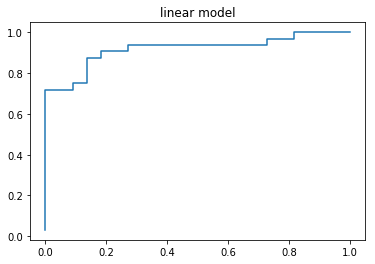

0.9076704545454545


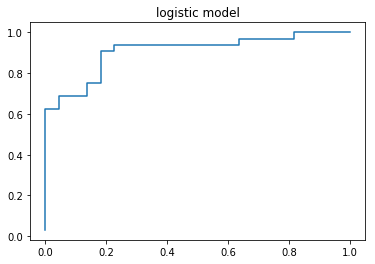

[0.9176136363636364, 0.9076704545454545]

In [255]:
# roc_curves
def compute_roc_curves():
    from sklearn import metrics
    x = np.array(lin_test_pred.astype('float'))
    y = np.array(test_labels.astype('float'))
    fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=1)
    lin_auc = metrics.auc(fpr, tpr)
    print lin_auc
    plt.title('linear model')
    plt.plot(fpr, tpr)
    plt.show()
    x = log_test_pred
    fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=1)
    log_auc = metrics.auc(fpr, tpr)
    print log_auc
    plt.title('logistic model')
    plt.plot(fpr, tpr)
    plt.show()
    return [lin_auc, log_auc]

compute_roc_curves()

In [256]:
# maximize optimal threshold
def calc_f1(pred, truth, th):
    TP = np.sum(np.multiply(pred>th, truth==1))
    FP = np.sum(np.multiply(pred>th, truth==0))
    TN = np.sum(np.multiply(pred<th, truth==0))
    FN = np.sum(np.multiply(pred<th, truth==1))
    return 2*float(TP)/float((2*TP + FP + FN))

max_f1_lin, max_f1_th_lin, max_f1_log, max_f1_th_log = -1,-1,-1,-1
for i in range(1000):
    th = float(i)/1000
    y = np.array(test_labels.astype('float'))
    x = np.array(lin_test_pred.astype('float'))
    val_lin = calc_f1(x,y,th)
    x = np.array(log_test_pred).astype('float')
    val_log = calc_f1(x,y,th)
    if val_lin > max_f1_lin:
        max_f1_lin = val_lin
        max_f1_th_lin = th
    if val_log > max_f1_log:
        max_f1_log = val_log
        max_f1_th_log = th
        
print max_f1_lin
print max_f1_log
print max_f1_th_lin
print max_f1_th_log

0.892307692308
0.89552238806
0.349
0.231


In [200]:
# stratified five-fold cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
skf = StratifiedKFold(n_splits=5)
X = data[:,0:13]
y = data[:,13].astype('int')
print X.shape
print y.shape
auc = []
f1 = []
for tr_ind, te_ind in skf.split(X, y):
    #print tr_ind
    #print te_ind
    train_data, test_data = X[tr_ind,:], X[te_ind,:]
    train_labels, test_labels = y[tr_ind], y[te_ind]
    #rss_feat_fwd(indDict)
    #rss_feat_bkwd(indDict)
    from sklearn import linear_model
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(train_data, train_labels)
    lin_test_pred = lin_reg.predict(test_data)
    ya = np.array(test_labels.astype('float'))
    xa = np.array(lin_test_pred.astype('float'))
    fpr, tpr, thresholds = metrics.roc_curve(ya, xa, pos_label=1)
    log_auc = metrics.auc(fpr, tpr)
    auc.append(log_auc)
    f1.append(calc_f1(xa,ya,th))
print auc
print f1

(270, 13)
(270,)
[0.8291666666666666, 0.8930555555555556, 0.9555555555555555, 0.8763888888888889, 0.9291666666666666]
[0.4, 0.2857142857142857, 0.45161290322580644, 0.2222222222222222, 0.3448275862068966]
